In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy 
import random
import math
import csv
from scipy.stats import poisson 
from scipy.integrate import quad
import sklearn.metrics.pairwise as sk
import seaborn as sns

# Setting Parameters

In [2]:
N_all = 1540
n_tasks = 14
n_latent = 2
n_missing_values = 50
n_folds = 1
epochs = 500
plot_interpolation = "None"
missing_experiment = True
kernel = 'M32_Periodic'
folder = '../Data/UK_Crime_Data/Separable_Sum/' + kernel + '/'

# Importing Data

In [3]:
outputs_noMissing = np.load(folder + 'outputs_missing.npy')
outputs = np.load(folder + 'outputs.npy')
inputs = np.load(folder + 'inputs.npy')
original_inputs = np.load(folder + 'original_inputs.npy')

In [4]:
# Normal Prior Experiment
final_dataset_MT_Normal = np.load(folder + 'final_dataset_Normal_MCPM_'+ str(missing_experiment)+'.npy')[0]
latent_means_MT_Normal = np.load(folder + 'latent_means_Normal_MCPM_'+str(missing_experiment)+'.npy')
latent_vars_MT_Normal = np.load(folder + 'latent_variances_Normal_MCPM_'+str(missing_experiment)+'.npy')
means_w_MT_Normal = np.load(folder + 'means_weights_Normal_MCPM_'+str(missing_experiment)+'.npy')
vars_w_MT_Normal = np.load(folder + 'covars_weights_Normal_MCPM_'+str(missing_experiment)+'.npy')
offsets_MT_Normal = np.load(folder + 'offsets_Normal_MCPM_'+str(missing_experiment)+'.npy')
nelbo_MT_Normal = np.load(folder + 'nelbo_values_Normal_MCPM_'+str(missing_experiment)+'10.npy')
times_Normal = np.load(folder + 'time_iterations_Normal_MCPM_'+str(missing_experiment)+'10.npy')

# Predictions
predictions_MT_Normal = final_dataset_MT_Normal[:,17:31]

In [5]:
# GP Prior Experiment
final_dataset_MT_GP = np.load(folder + 'final_dataset_GP_MCPM_'+ str(missing_experiment)+'.npy')[0]
latent_means_MT_GP = np.load(folder + 'latent_means_GP_MCPM_'+str(missing_experiment)+'.npy')
latent_vars_MT_GP = np.load(folder + 'latent_variances_GP_MCPM_'+str(missing_experiment)+'.npy')
means_w_MT_GP = np.load(folder + 'means_weights_GP_MCPM_'+str(missing_experiment)+'.npy')
vars_w_MT_GP = np.load(folder + 'covars_weights_GP_MCPM_'+str(missing_experiment)+'.npy')
offsets_MT_GP = np.load(folder + 'offsets_GP_MCPM_'+str(missing_experiment)+'.npy')
nelbo_MT_GP = np.load(folder + 'nelbo_values_GP_MCPM_'+str(missing_experiment)+'10.npy')
times_GP = np.load(folder + 'time_iterations_GP_MCPM_'+str(missing_experiment)+'10.npy')

# Predictions
predictions_MT_GP = final_dataset_MT_GP[:,17:31]

In [6]:
# LGCP Experiment
final_dataset_MT_LGCP = np.load(folder + 'final_dataset_Normal_LGCP_'+ str(missing_experiment)+'.npy')[0]
latent_means_MT_LGCP = np.load(folder + 'latent_means_Normal_LGCP_'+str(missing_experiment)+'.npy')
latent_vars_MT_LGCP = np.load(folder + 'latent_variances_Normal_LGCP_'+str(missing_experiment)+'.npy')
means_w_MT_LGCP = np.load(folder + 'means_weights_Normal_LGCP_'+str(missing_experiment)+'.npy')
vars_w_MT_LGCP = np.load(folder + 'covars_weights_Normal_LGCP_'+str(missing_experiment)+'.npy')
offsets_MT_LGCP = np.load(folder + 'offsets_Normal_LGCP_'+str(missing_experiment)+'.npy')
nelbo_MT_LGCP = np.load(folder + 'nelbo_values_Normal_LGCP_'+str(missing_experiment)+'10.npy')
nelbo_MT_LGCP = np.reshape(nelbo_MT_LGCP,[epochs,n_tasks])
times_LGCP = np.load(folder + 'time_iterations_Normal_LGCP_'+str(missing_experiment)+'10.npy')

# Predictions
predictions_MT_LGCP = final_dataset_MT_LGCP[:,17:31]

## Indeces of Missing Values

In [7]:
index = np.zeros((n_tasks,n_missing_values))
index[0] = np.concatenate((range(10,35),range(54,79)))
index[1] = np.concatenate((range(430,440),range(474,484),range(518,528),range(562,572),range(606,616)))
index[2] = np.concatenate((range(120,130),range(154,174),range(198,218)))
index[3] = np.concatenate((range(50,75),range(94,119)))
index[4] = np.concatenate((range(1295,1305),range(1339,1349),range(1383,1393),range(1427,1437),range(1471,1481)))
index[5] = np.concatenate((range(904,924),range(948,968),range(992,1002)))
index[6] = np.concatenate((range(1427,1452),range(1471,1496)))
index[7] = np.concatenate((range(750,775),range(794,819)))
index[8] = np.concatenate((range(550,570),range(594,614),range(638,648)))
index[9] = np.concatenate((range(250,260),range(294,304),range(338,348),range(382,392),range(426,436)))
index[10] = np.concatenate((range(826,836),range(870,880),range(914,924),range(958,968),range(1002,1012)))
index[11] = np.concatenate((range(635,660),range(679,704)))
index[12] = np.concatenate((range(1101,1121),range(1145,1165),range(1189,1199)))
index[13] = np.concatenate((range(1453,1478),range(1497,1522)))

indeces_missing = np.transpose(np.reshape(np.concatenate((index[0], index[1], index[2], index[3], index[4], index[5], index[6], 
                                                          index[7], index[8], index[9], index[10], index[11], index[12], 
                                                          index[13])), (n_tasks, n_missing_values)))

In [8]:
# creating array for missing values
masked_array = np.zeros((n_tasks,N_all))
for i in range(13):
    index = indeces_missing[:,i]
    for j in range(len(index)):
        #print(index[j])
        masked_array[i,int(index[j])] = 1

# Plotting Results

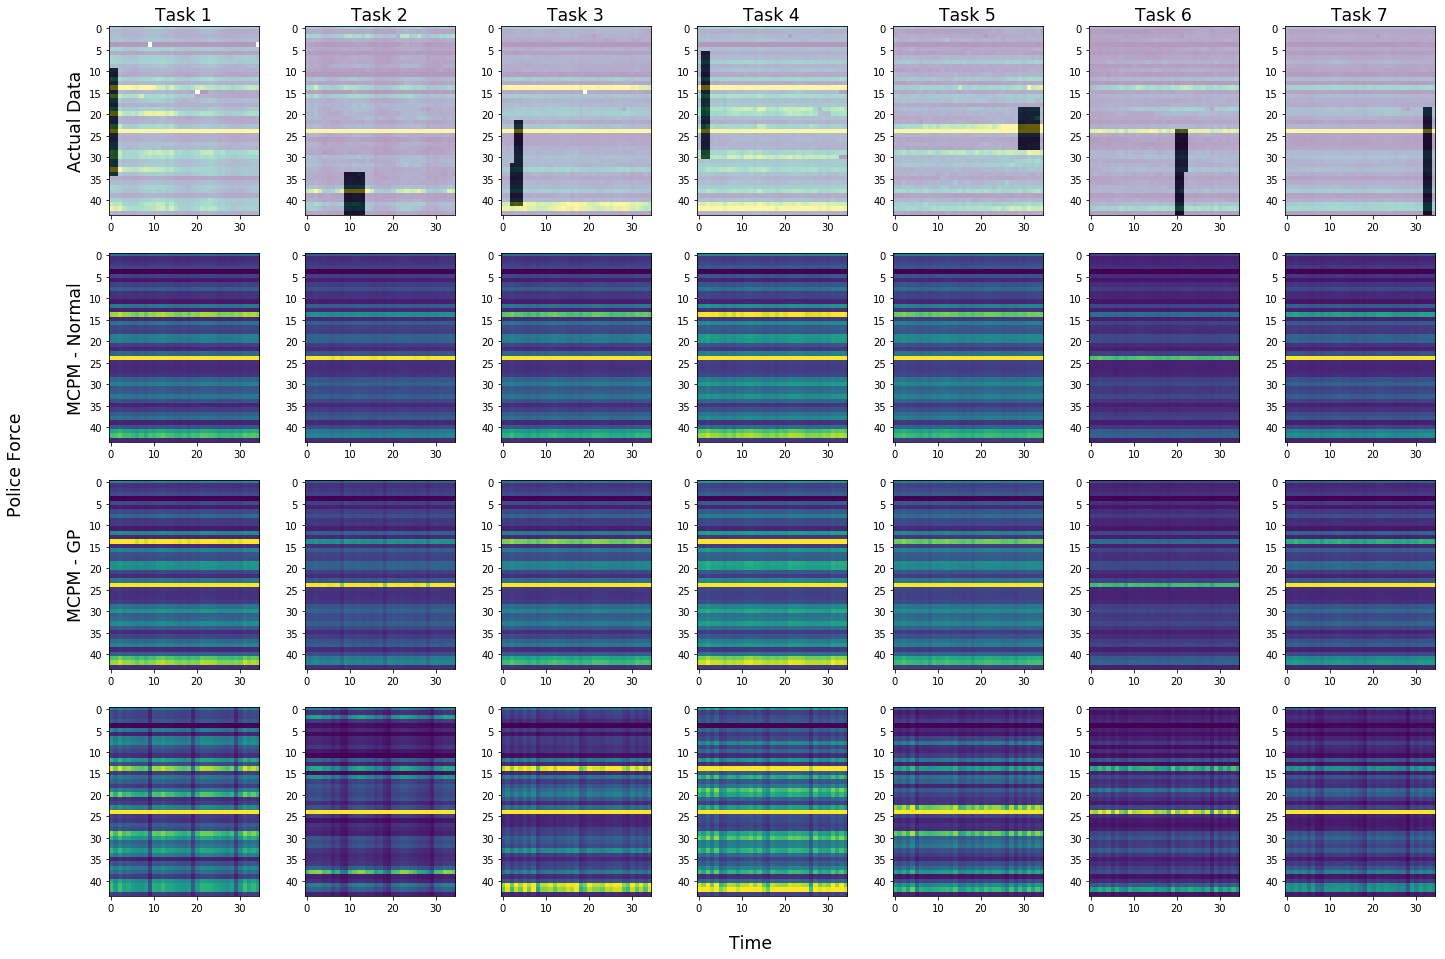

In [9]:
# Plotting Task 1 - 7 Results
fig, axes = plt.subplots(nrows=4,ncols=7,figsize=(24,16))
(ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, 
 ax15, ax16, ax17, ax18, ax19, ax20, ax21, ax22, ax23, ax24, ax25, ax26,
ax27, ax28) = axes.flatten()
fig.text(0.5, 0.08, 'Time', ha='center', fontsize='xx-large')
fig.text(0.07, 0.5, 'Police Force', va='center', rotation='vertical', fontsize='xx-large')
ax1.set_ylabel('Actual Data',fontsize='xx-large')
ax8.set_ylabel('MCPM - Normal',fontsize='xx-large')
ax15.set_ylabel('MCPM - GP',fontsize='xx-large')

ax1.imshow(outputs[:,0].reshape(35,44).T,vmax=7500)
ax1.imshow(masked_array[0].reshape(35,44).T, interpolation='nearest', cmap="binary", alpha=0.6)
ax1.set_title('Task 1',fontsize='xx-large')
ax2.imshow(outputs[:,1].reshape(35,44).T,vmax=700)
ax2.imshow(masked_array[1].reshape(35,44).T, interpolation='nearest', cmap="binary", alpha=0.6)
ax2.set_title('Task 2',fontsize='xx-large')
ax3.imshow(outputs[:,2].reshape(35,44).T,vmax=2500)
ax3.imshow(masked_array[2].reshape(35,44).T, interpolation='nearest', cmap="binary", alpha=0.6)
ax3.set_title('Task 3',fontsize='xx-large')
ax4.imshow(outputs[:,3].reshape(35,44).T,vmax=2500)
ax4.imshow(masked_array[3].reshape(35,44).T, interpolation='nearest', cmap="binary", alpha=0.6)
ax4.set_title('Task 4',fontsize='xx-large')
ax5.imshow(outputs[:,4].reshape(35,44).T,vmax=750)
ax5.imshow(masked_array[4].reshape(35,44).T, interpolation='nearest', cmap="binary", alpha=0.6)
ax5.set_title('Task 5',fontsize='xx-large')
ax6.imshow(outputs[:,5].reshape(35,44).T,vmax=1000)
ax6.imshow(masked_array[5].reshape(35,44).T, interpolation='nearest', cmap="binary", alpha=0.6)
ax6.set_title('Task 6',fontsize='xx-large')
ax7.imshow(outputs[:,6].reshape(35,44).T,vmax=4000)
ax7.imshow(masked_array[6].reshape(35,44).T, interpolation='nearest', cmap="binary", alpha=0.6)
ax7.set_title('Task 7',fontsize='xx-large')

ax8.imshow(predictions_MT_Normal[:,0].reshape(35,44).T,vmax=7500)
ax9.imshow(predictions_MT_Normal[:,1].reshape(35,44).T,vmax=700)
ax10.imshow(predictions_MT_Normal[:,2].reshape(35,44).T,vmax=2500)
ax11.imshow(predictions_MT_Normal[:,3].reshape(35,44).T,vmax=2500)
ax12.imshow(predictions_MT_Normal[:,4].reshape(35,44).T,vmax=750)
ax13.imshow(predictions_MT_Normal[:,5].reshape(35,44).T,vmax=1000)
ax14.imshow(predictions_MT_Normal[:,6].reshape(35,44).T,vmax=4000)

ax15.imshow(predictions_MT_GP[:,0].reshape(35,44).T,vmax=7500)
ax16.imshow(predictions_MT_GP[:,1].reshape(35,44).T,vmax=700)
ax17.imshow(predictions_MT_GP[:,2].reshape(35,44).T,vmax=2500)
ax18.imshow(predictions_MT_GP[:,3].reshape(35,44).T,vmax=2500)
ax19.imshow(predictions_MT_GP[:,4].reshape(35,44).T,vmax=750)
ax20.imshow(predictions_MT_GP[:,5].reshape(35,44).T,vmax=1000)
ax21.imshow(predictions_MT_GP[:,6].reshape(35,44).T,vmax=4000)

ax22.imshow(predictions_MT_LGCP[:,0].reshape(35,44).T,vmax=7500)
ax23.imshow(predictions_MT_LGCP[:,1].reshape(35,44).T,vmax=700)
ax24.imshow(predictions_MT_LGCP[:,2].reshape(35,44).T,vmax=2500)
ax25.imshow(predictions_MT_LGCP[:,3].reshape(35,44).T,vmax=2500)
ax26.imshow(predictions_MT_LGCP[:,4].reshape(35,44).T,vmax=750)
ax27.imshow(predictions_MT_LGCP[:,5].reshape(35,44).T,vmax=1000)
ax28.imshow(predictions_MT_LGCP[:,6].reshape(35,44).T,vmax=4000)

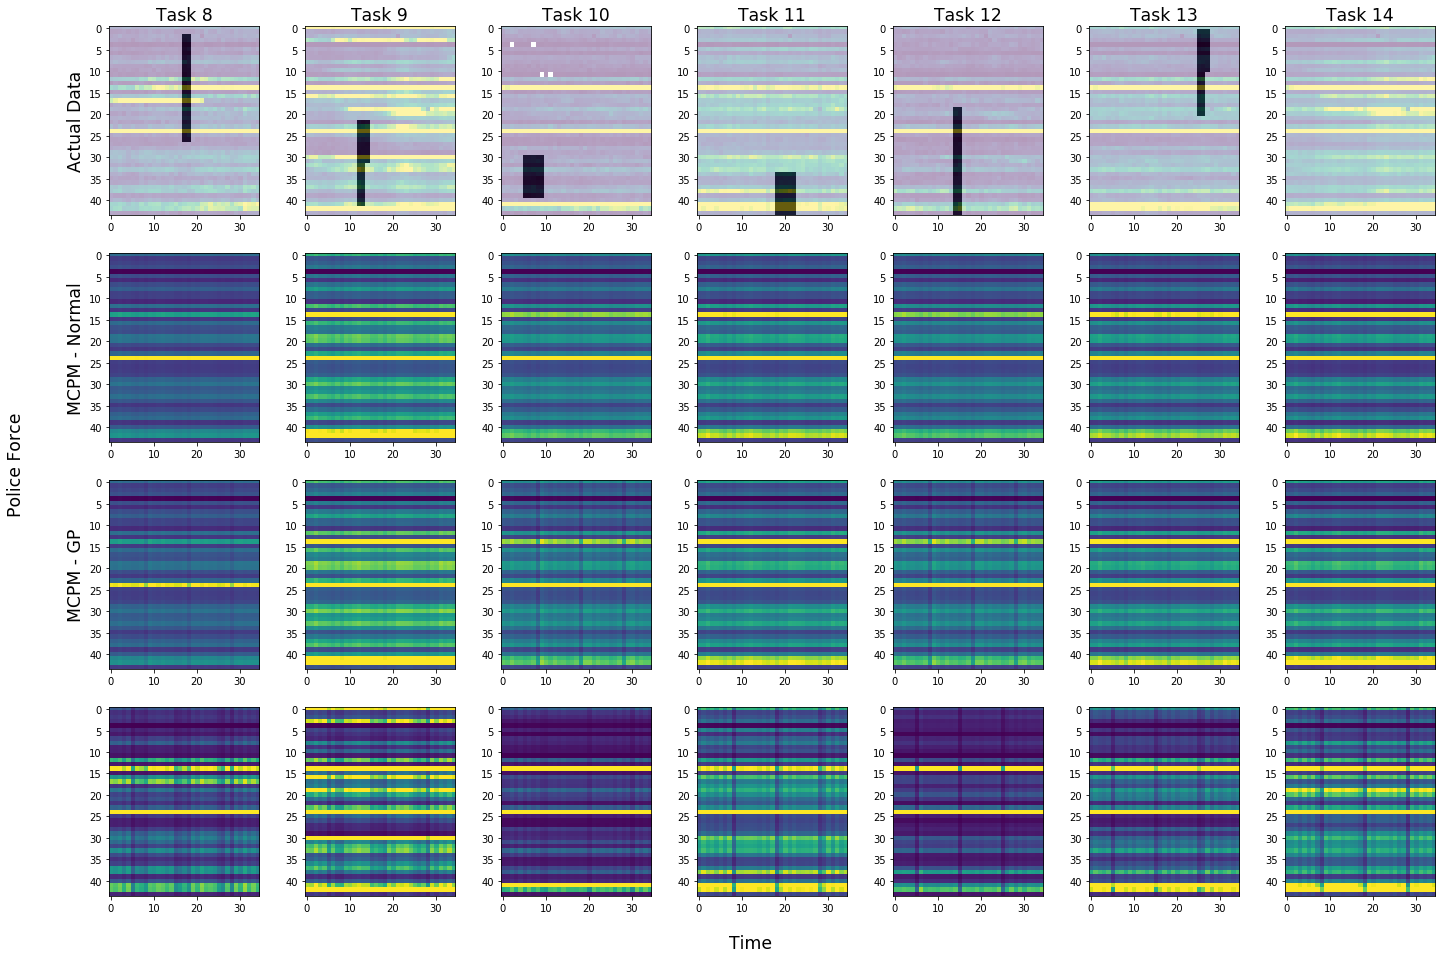

In [10]:
# Plotting Task 8 - 14 Results
fig, axes = plt.subplots(nrows=4,ncols=7,figsize=(24,16))
(ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, 
 ax15, ax16, ax17, ax18, ax19, ax20, ax21, ax22, ax23, ax24, ax25, ax26, ax27,
ax28) = axes.flatten()
fig.text(0.5, 0.08, 'Time', ha='center', fontsize='xx-large')
fig.text(0.07, 0.5, 'Police Force', va='center', rotation='vertical', fontsize='xx-large')
ax1.set_ylabel('Actual Data',fontsize='xx-large')
ax8.set_ylabel('MCPM - Normal',fontsize='xx-large')
ax15.set_ylabel('MCPM - GP',fontsize='xx-large')

ax1.imshow(outputs[:,7].reshape(35,44).T,vmax=250)
ax1.imshow(masked_array[7].reshape(35,44).T, interpolation='nearest', cmap="binary", alpha=0.6)
ax1.set_title('Task 8',fontsize='xx-large')
ax2.imshow(outputs[:,8].reshape(35,44).T,vmax=1250)
ax2.imshow(masked_array[8].reshape(35,44).T, interpolation='nearest', cmap="binary", alpha=0.6)
ax2.set_title('Task 9',fontsize='xx-large')
ax3.imshow(outputs[:,9].reshape(35,44).T,vmax=400)
ax3.imshow(masked_array[9].reshape(35,44).T, interpolation='nearest', cmap="binary", alpha=0.6)
ax3.set_title('Task 10',fontsize='xx-large')
ax4.imshow(outputs[:,10].reshape(35,44).T,vmax=1500)
ax4.imshow(masked_array[10].reshape(35,44).T, interpolation='nearest', cmap="binary", alpha=0.6)
ax4.set_title('Task 11',fontsize='xx-large')
ax5.imshow(outputs[:,11].reshape(35,44).T,vmax=500)
ax5.imshow(masked_array[11].reshape(35,44).T, interpolation='nearest', cmap="binary", alpha=0.6)
ax5.set_title('Task 12',fontsize='xx-large')
ax6.imshow(outputs[:,12].reshape(35,44).T,vmax=2000)
ax6.imshow(masked_array[12].reshape(35,44).T, interpolation='nearest', cmap="binary", alpha=0.6)
ax6.set_title('Task 13',fontsize='xx-large')
ax7.imshow(outputs[:,13].reshape(35,44).T,vmax=6000)
ax7.imshow(masked_array[13].reshape(35,44).T, interpolation='nearest', cmap="binary", alpha=0.6)
ax7.set_title('Task 14',fontsize='xx-large')

ax8.imshow(predictions_MT_Normal[:,7].reshape(35,44).T,vmax=250)
ax9.imshow(predictions_MT_Normal[:,8].reshape(35,44).T,vmax=1250)
ax10.imshow(predictions_MT_Normal[:,9].reshape(35,44).T,vmax=400)
ax11.imshow(predictions_MT_Normal[:,10].reshape(35,44).T,vmax=1500)
ax12.imshow(predictions_MT_Normal[:,11].reshape(35,44).T,vmax=500)
ax13.imshow(predictions_MT_Normal[:,12].reshape(35,44).T,vmax=2000)
ax14.imshow(predictions_MT_Normal[:,13].reshape(35,44).T,vmax=6000)

ax15.imshow(predictions_MT_GP[:,7].reshape(35,44).T,vmax=250)
ax16.imshow(predictions_MT_GP[:,8].reshape(35,44).T,vmax=1250)
ax17.imshow(predictions_MT_GP[:,9].reshape(35,44).T,vmax=400)
ax18.imshow(predictions_MT_GP[:,10].reshape(35,44).T,vmax=1500)
ax19.imshow(predictions_MT_GP[:,11].reshape(35,44).T,vmax=500)
ax20.imshow(predictions_MT_GP[:,12].reshape(35,44).T,vmax=2000)
ax21.imshow(predictions_MT_GP[:,13].reshape(35,44).T,vmax=6000)

ax22.imshow(predictions_MT_LGCP[:,7].reshape(35,44).T,vmax=250)
ax23.imshow(predictions_MT_LGCP[:,8].reshape(35,44).T,vmax=1250)
ax24.imshow(predictions_MT_LGCP[:,9].reshape(35,44).T,vmax=400)
ax25.imshow(predictions_MT_LGCP[:,10].reshape(35,44).T,vmax=1500)
ax26.imshow(predictions_MT_LGCP[:,11].reshape(35,44).T,vmax=500)
ax27.imshow(predictions_MT_LGCP[:,12].reshape(35,44).T,vmax=2000)
ax28.imshow(predictions_MT_LGCP[:,13].reshape(35,44).T,vmax=6000)

# Computing Performance of Experiments

In [11]:
# Creating Arrays for Performance Metrics
RMSE_MT_Normal = np.zeros((n_tasks))
RMSE_MT_GP = np.zeros((n_tasks))
RMSE_MT_LGCP = np.zeros((n_tasks))

NLPL_MT_Normal = np.zeros((n_tasks))
NLPL_MT_GP = np.zeros((n_tasks))
NLPL_MT_LGCP = np.zeros((n_tasks))

for task in range(n_tasks):
    RMSE_MT_Normal[task] = np.sqrt(np.sum(np.square(outputs[indeces_missing[:,task].astype(int),task] - predictions_MT_Normal[indeces_missing[:,task].astype(int),task]))/n_missing_values)
    RMSE_MT_GP[task] = np.sqrt(np.sum(np.square(outputs[indeces_missing[:,task].astype(int),task] - predictions_MT_GP[indeces_missing[:,task].astype(int),task]))/n_missing_values)
    RMSE_MT_LGCP[task] = np.sqrt(np.sum(np.square(outputs[indeces_missing[:,task].astype(int),task] - predictions_MT_LGCP[indeces_missing[:,task].astype(int),task]))/n_missing_values)
    
    NLPL_MT_Normal[task] = - np.sum(poisson.logpmf(np.around(outputs[indeces_missing[:,task].astype(int),task]),predictions_MT_Normal[indeces_missing[:,task].astype(int),task]))/n_missing_values
    NLPL_MT_GP[task] = - np.sum(poisson.logpmf(np.around(outputs[indeces_missing[:,task].astype(int),task]),predictions_MT_GP[indeces_missing[:,task].astype(int),task]))/n_missing_values
    NLPL_MT_LGCP[task] = - np.sum(poisson.logpmf(np.around(outputs[indeces_missing[:,task].astype(int),task]),predictions_MT_LGCP[indeces_missing[:,task].astype(int),task]))/n_missing_values

In [12]:
# Printing Normal MT Results
print('RMSE (Normal):', RMSE_MT_Normal)
print('NLPL (Normal):', NLPL_MT_Normal)
print('Total Time (Normal):', times_Normal)
print('Time per Epoch:', times_Normal/epochs)

RMSE (Normal): [2626.52741344  173.7824259   459.00717823  351.59042844  740.73293999
   86.40002201 1100.41339857   79.84734756  392.19030126   99.54329257
  238.83223235  704.96543702  254.21328845 1486.16401817]
NLPL (Normal): [795.18783373  48.40672911  44.17128508  34.17831905 178.72341647
  14.6532606   94.61380821  24.90663507 108.51709645  44.83005921
  30.74351786 183.87649222  49.03370573 366.27945904]
Total Time (Normal): [3410.04232216]
Time per Epoch: [6.82008464]


In [13]:
# Printing GP MT Results
print('RMSE (GP):', RMSE_MT_GP)
print('NLPL (GP):', NLPL_MT_GP)
print('Total Time (Normal):', times_GP)
print('Time per Epoch:', times_GP/epochs)

RMSE (GP): [1976.10601627  170.98740112  413.03378219  375.81077341  747.99770407
   91.12137079 1004.74768224   83.97388699  393.49393576  105.55790427
  206.58955856  701.96546418  250.6591141  1266.11523178]
NLPL (GP): [497.87036751  46.4095265   41.10927134  27.11011713 182.56490852
  15.77174453  81.46849506  26.88133274 114.08258321  48.27593738
  24.11925814 182.9903853   53.32474165 200.87232135]
Total Time (Normal): [3503.12918091]
Time per Epoch: [7.00625836]


In [14]:
# Printing LGCP Results
print('RMSE (LGCP):', RMSE_MT_LGCP)
print('NLPL (LGCP):', NLPL_MT_LGCP)
print('Total Time (Normal):', np.sum(times_LGCP[0],axis=1)[0])
print('Time per Epoch:', np.sum(times_LGCP[0],axis=1)[0]/epochs)

RMSE (LGCP): [1538.3184768   102.8573588   178.43666129  145.1025303   164.23744224
   41.2294695   211.15132409   31.78912539  147.56292171   15.41203551
  183.11673364  381.85229082  261.19102644  946.84380737]
NLPL (LGCP): [240.94648794  22.39250812  12.55350956  11.73225509  16.59614482
   6.67502474  14.46721434   6.00578251  16.01907458   4.43356868
  24.24204571  51.59716822  45.05923914 154.86056988]
Total Time (Normal): 66182.25923871994
Time per Epoch: 132.36451847743987


In [17]:
times_LGCP[0,0,:]

array([3818.36845088, 3811.30603528, 3825.17000151, 3796.73308039,
       5651.66366029, 5689.66456008, 5671.61312151, 5677.46815491,
       5659.87437677, 5628.41869235, 5675.94686675, 5667.81952739,
       2804.55009174, 2803.66261888])

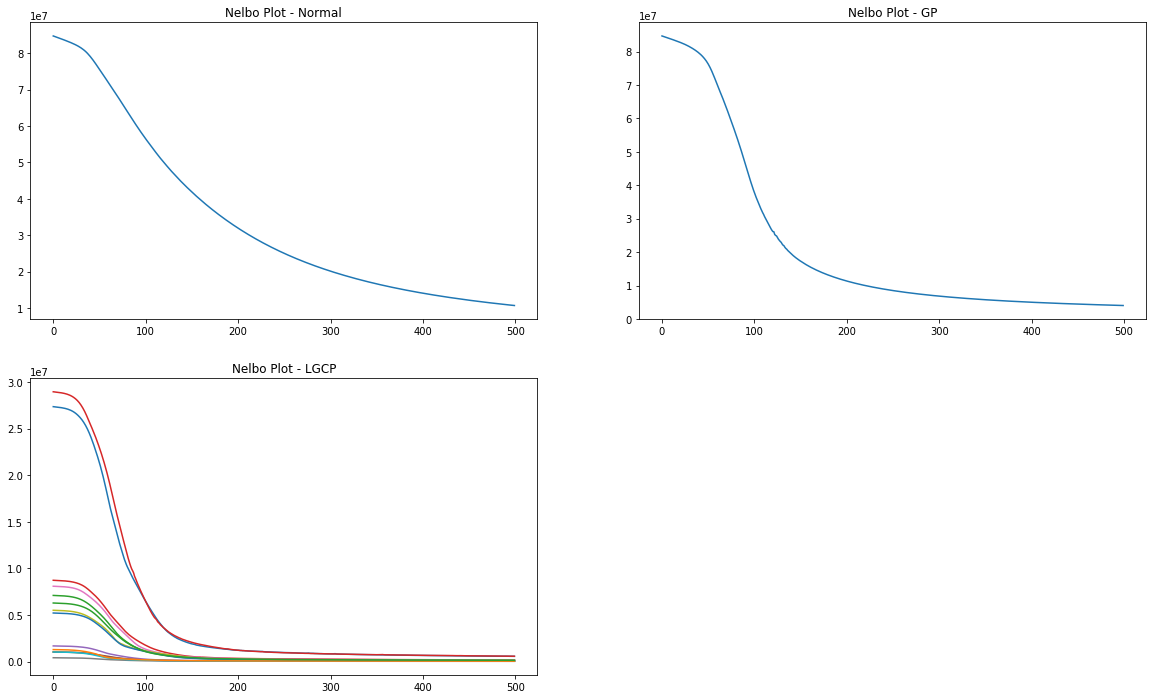

In [15]:
# Plotting Nelbo Values
plt.figure(figsize=(20,12))
ax1 = plt.subplot(221)
ax1.plot(nelbo_MT_Normal)
ax1.title.set_text('Nelbo Plot - Normal')

ax2 = plt.subplot(222)
ax2.plot(nelbo_MT_GP)
ax2.title.set_text('Nelbo Plot - GP')

ax3 = plt.subplot(223)
ax3.plot(nelbo_MT_LGCP)
ax3.title.set_text('Nelbo Plot - LGCP')